# 1- Importing libraries

In [204]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

from matplotlib import rcParams
rcParams['figure.figsize'] = 13, 6 
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
%config InlineBackend.figure_format = 'retina'

2.15.0
1.26.3


In [205]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 2- Resizing images

In [206]:
img_data_size = 50


def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1117  images to be resized.
1117  images resized.
가위 이미지 resize 완료!


In [207]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1288  images to be resized.
1288  images resized.
바위 이미지 resize 완료!


In [208]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size, img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1271  images to be resized.
1271  images resized.
보 이미지 resize 완료!


# 3- Labeling train dataset

In [209]:
import numpy as np

def load_data(img_path, number_of_data=3676):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=img_data_size
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/train"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3676 입니다.
x_train shape: (3676, 50, 50, 3)
y_train shape: (3676,)


## Validation dataset 분리

In [210]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=55)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("x_val shape: {}".format(x_val.shape))
print("y_val shape: {}".format(y_val.shape))

x_train shape: (2573, 50, 50, 3)
y_train shape: (2573,)
x_val shape: (1103, 50, 50, 3)
y_val shape: (1103,)


라벨:  0


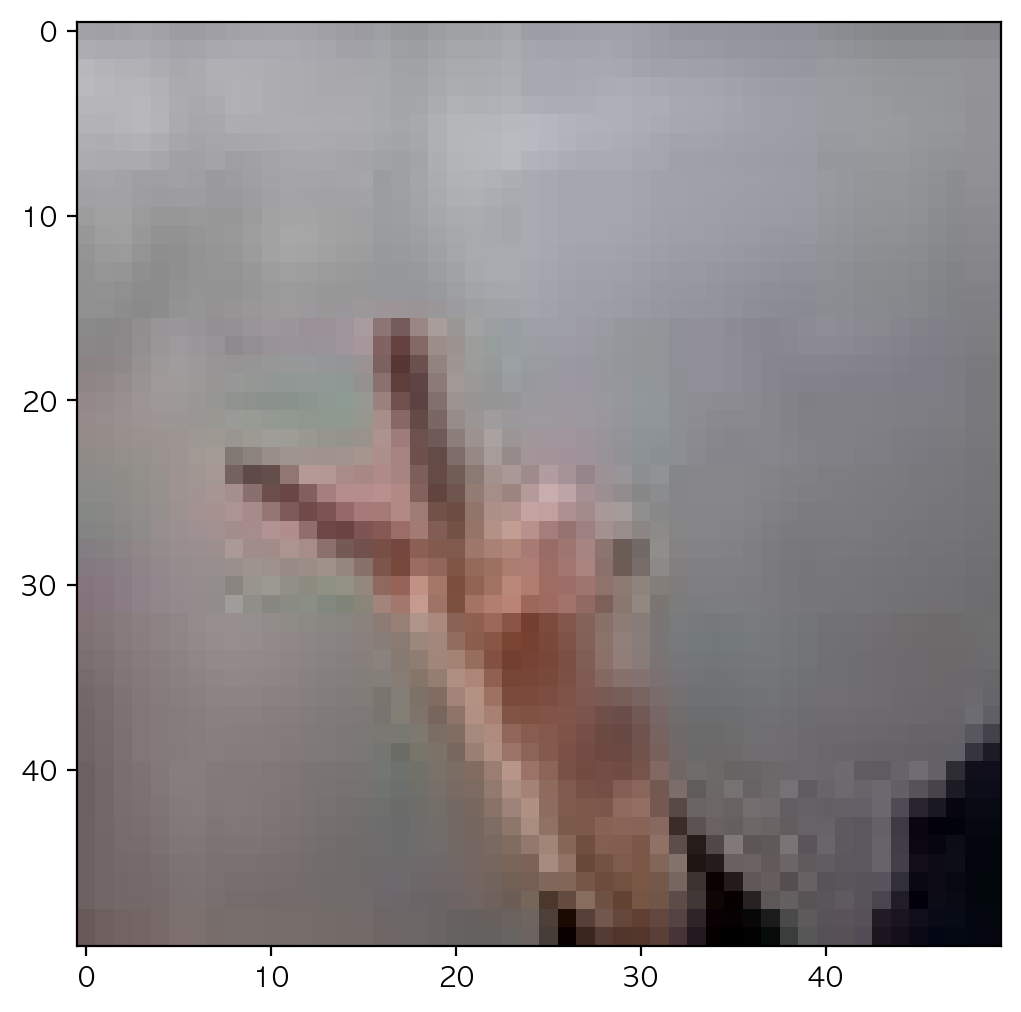

In [211]:
import matplotlib.pyplot as plt

plt.imshow(x_train[500])
print('라벨: ', y_train[500])

라벨:  1


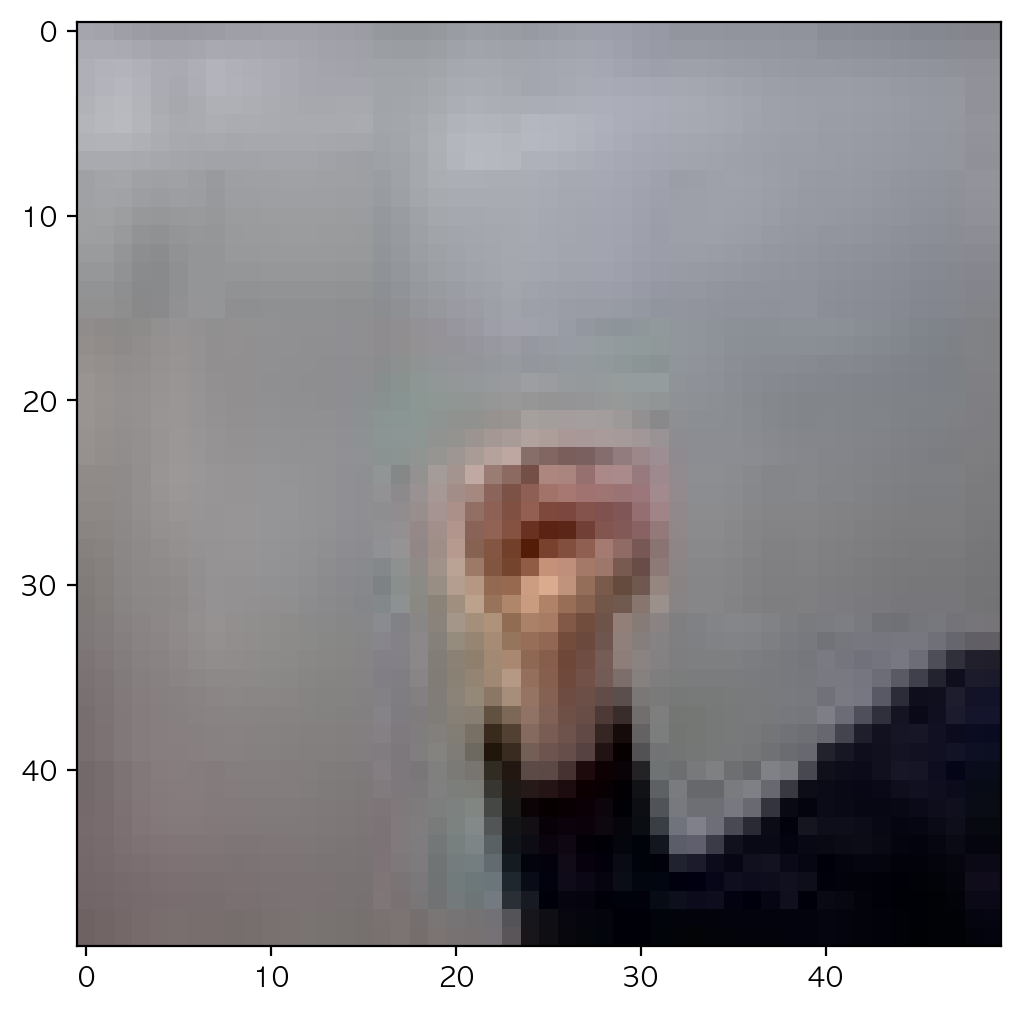

In [212]:
plt.imshow(x_val[120])
print('라벨: ', y_val[120])

# 4- Designing model

In [213]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers  # Add this line to import regularizers
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# parameters for tuning model
n_channel_1 = 16
n_channel_2 = 32
n_channel_3 = 64
n_dense = 128
n_train_epoch = 30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(
    n_channel_1,
    (3, 3),
    activation = 'relu',
    input_shape = (img_data_size, img_data_size, 3)
))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(
    n_channel_2,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Conv2D(
    n_channel_3,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    n_dense,
    activation = 'relu',
    kernel_regularizer=regularizers.l1_l2(.001),  # L1 규제와 L2 규제를 추가
))
model.add(keras.layers.Dropout(0.2)) # 드롭아웃 추가
model.add(keras.layers.Dense(
    3,
    activation = 'softmax'
))

model.summary()


Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 24, 24, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 11, 11, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 4, 4, 64)        

# 5- Training model

In [214]:
# model compile
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# model training
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=n_train_epoch,
    batch_size = 100,
)


# model evaluation
val_loss, val_accuracy = model.evaluate(
    x_val, 
    y_val, 
    verbose=2
)

print(f'validation_loss: {val_loss}')
print(f'validation_accuracy: {val_accuracy}')

Epoch 1/30
26/26 [==============================] - 2s 59ms/step - loss: 17.1875 - accuracy: 0.3820 - val_loss: 6.1971 - val_accuracy: 0.4198
Epoch 2/30
26/26 [==============================] - 1s 24ms/step - loss: 5.7445 - accuracy: 0.5325 - val_loss: 3.9788 - val_accuracy: 0.7090
Epoch 3/30
26/26 [==============================] - 1s 23ms/step - loss: 4.0194 - accuracy: 0.6945 - val_loss: 3.1892 - val_accuracy: 0.8395
Epoch 4/30
26/26 [==============================] - 1s 24ms/step - loss: 3.3671 - accuracy: 0.7812 - val_loss: 2.8680 - val_accuracy: 0.9003
Epoch 5/30
26/26 [==============================] - 1s 24ms/step - loss: 3.1295 - accuracy: 0.8131 - val_loss: 3.2744 - val_accuracy: 0.7507
Epoch 6/30
26/26 [==============================] - 1s 24ms/step - loss: 2.8872 - accuracy: 0.8492 - val_loss: 2.5025 - val_accuracy: 0.9529
Epoch 7/30
26/26 [==============================] - 1s 24ms/step - loss: 2.6131 - accuracy: 0.9036 - val_loss: 2.3918 - val_accuracy: 0.9547
Epoch 8/30
2

In [215]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# 6- Evaluation model

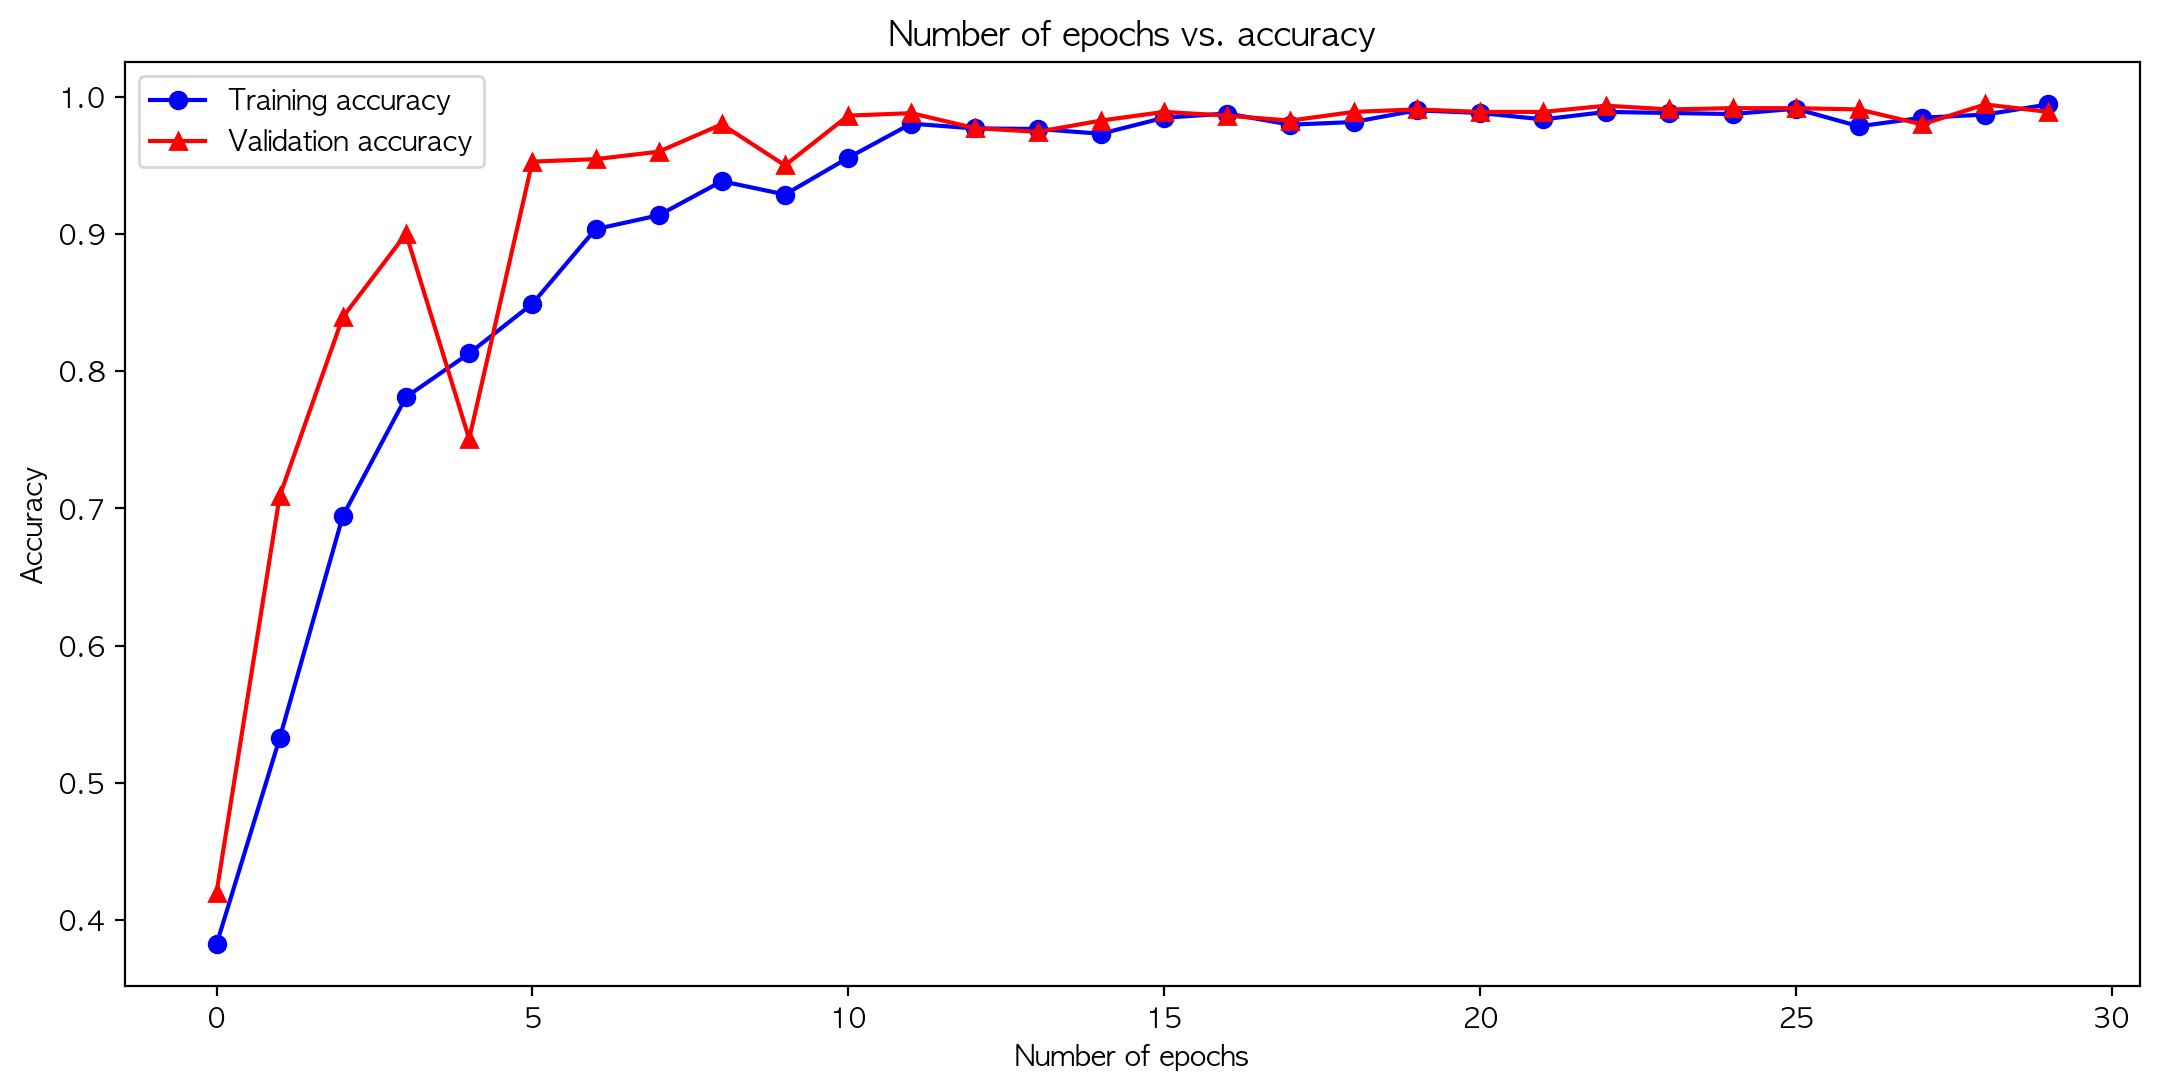

In [216]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs
accuracy_val = history.history['val_accuracy']  ##getting validation accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

plt.plot(epochs_, accuracy_val, label = "Validation accuracy", color='red', marker = '^')
plt.title("Number of epochs vs. accuracy")
plt.legend()

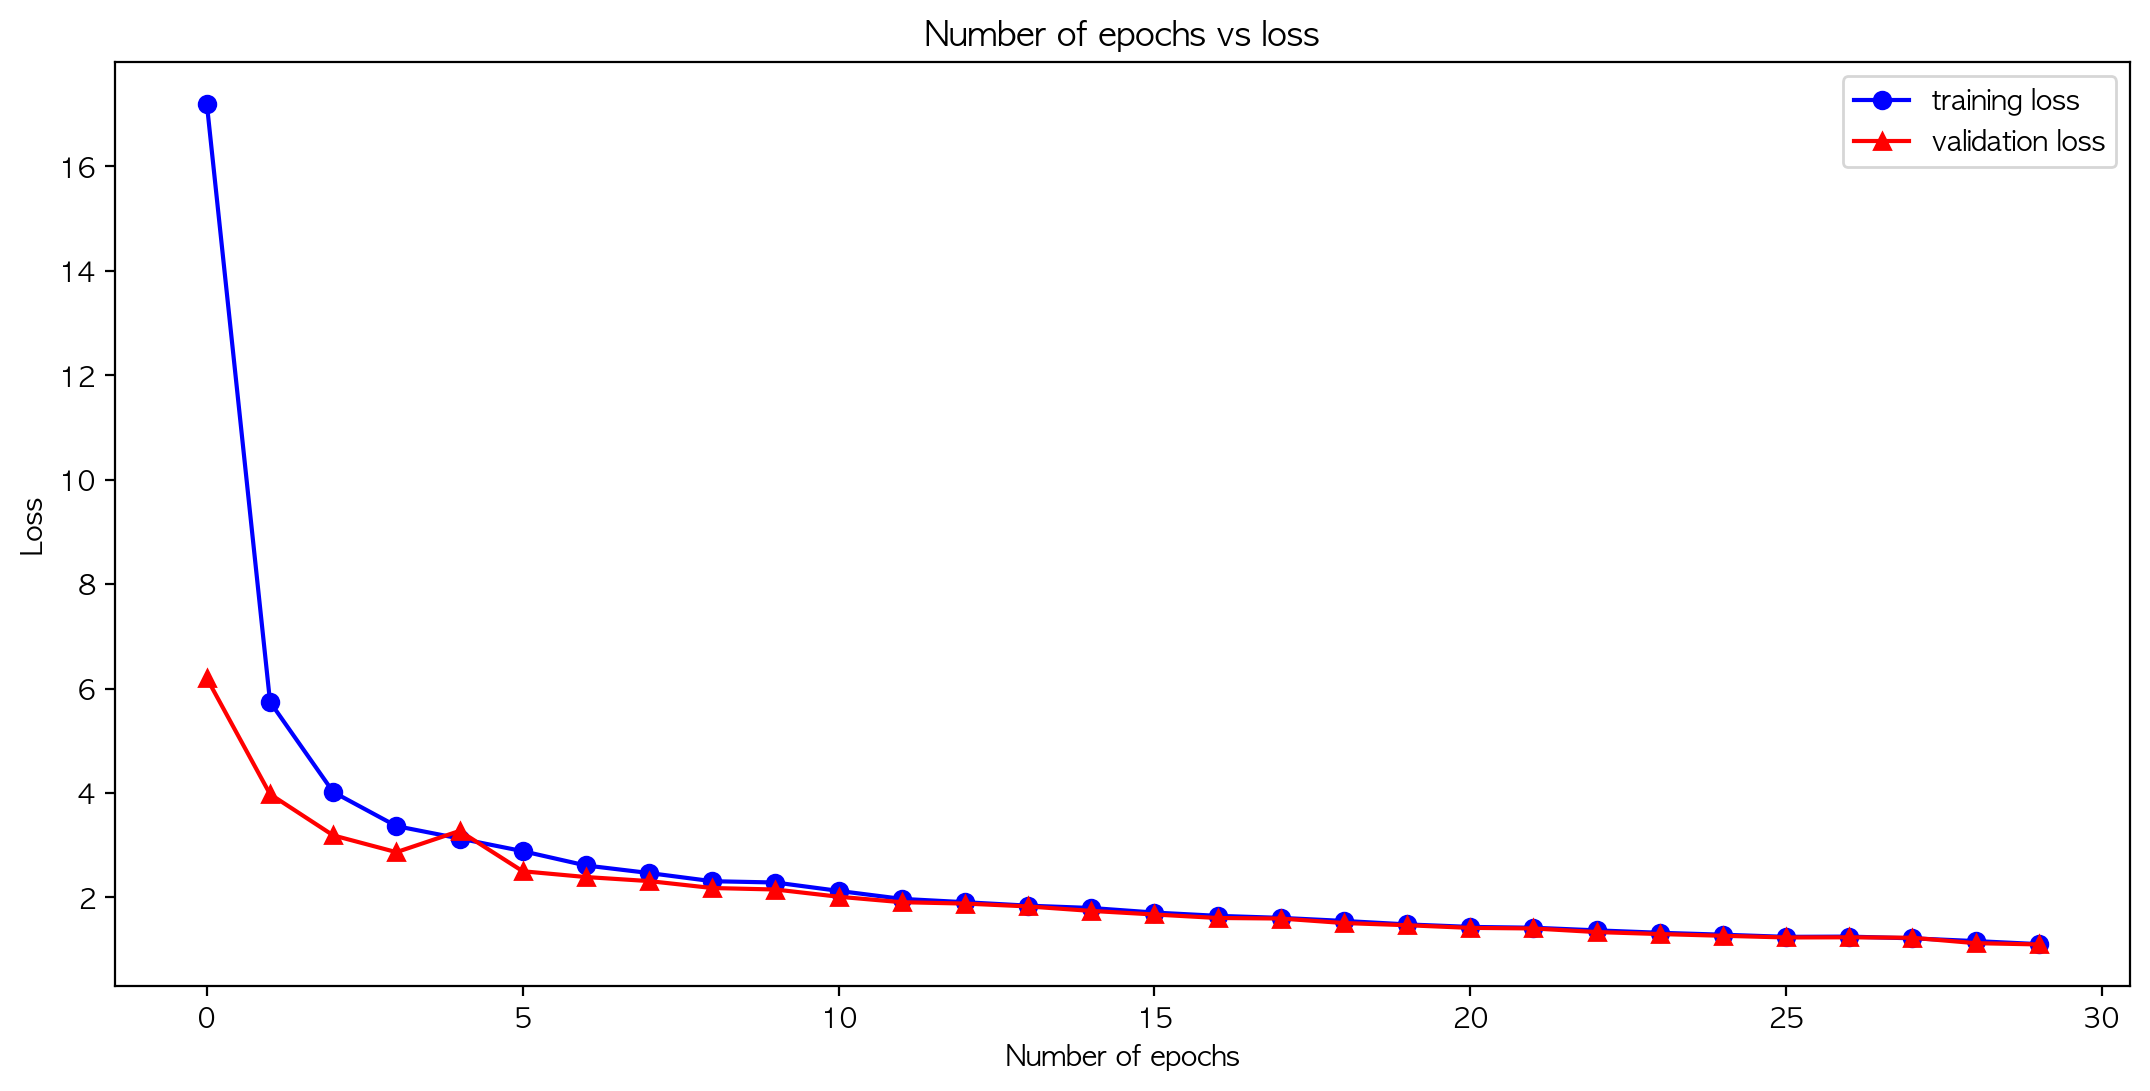

In [217]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
loss_train = history.history['loss']    ##getting  loss of each epochs
loss_val = history.history['val_loss']  ## getting validation loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.plot(epochs_, loss_val, label="validation loss", color='red', marker = '^')
plt.title('Number of epochs vs loss')
plt.legend()

### Rename jpg file name with directory and initial

In [140]:
# import os
# import shutil

# def rename_files_in_directory(directory_path, initials):
#     # Get all files in the directory
#     files = os.listdir(directory_path)

#     # Filter out all .jpg files
#     jpg_files = [f for f in files if f.endswith('.jpg')]

#     # Loop over all .jpg files
#     for i, file_name in enumerate(jpg_files):
#         # Create new file name
#         new_file_name = f"{initials}_{i}.jpg"

#         # Get full file paths
#         old_file_path = os.path.join(directory_path, file_name)
#         new_file_path = os.path.join(directory_path, new_file_name)

#         # Rename file
#         shutil.move(old_file_path, new_file_path)

# # Usage
# rename_files_in_directory('/Users/kenny_jung/Downloads/scissor/', 'jh')

# 7- Resizing test image

In [218]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/scissor"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

635  images to be resized.
635  images resized.
가위 이미지 resize 완료!


In [219]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/rock"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

675  images to be resized.
675  images resized.
바위 이미지 resize 완료!


In [220]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    # target_size=(28,28)
    target_size=(img_data_size,img_data_size)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.LANCZOS)  # Replace Image.ANTIALIAS with Image.LANCZOS
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test/paper"  # Assign a valid string value to image_dir_path
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

648  images to be resized.
648  images resized.
보 이미지 resize 완료!


# 8- Labeling test dataset

In [221]:
import numpy as np

def load_data(img_path, number_of_data=1958):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    # img_size=28
    img_size=img_data_size
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = "/Users/kenny_jung/aiffel/data/sc_ro_pa/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


학습데이터(x_test)의 이미지 개수는 1958 입니다.
x_test shape: (1958, 50, 50, 3)
y_test shape: (1958,)


# 9- Prediction with model

In [222]:
y_pre = model.predict(x_test)

62/62 [==============================] - 1s 10ms/step


# 10- Evaluation

In [223]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

62/62 - 1s - loss: 3.5038 - accuracy: 0.4525 - 651ms/epoch - 11ms/step
test_loss: 3.50380277633667 
test_accuracy: 0.4525025486946106
